**Import Packages**

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

**Draw Coastlines**

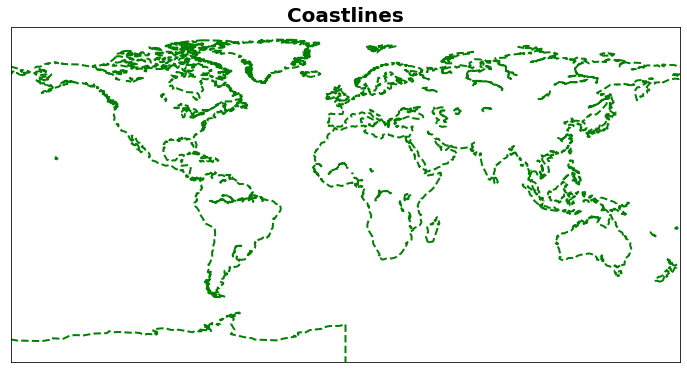

In [10]:
fig = plt.figure(figsize=(12,12))
m = Basemap()
m.drawcoastlines(linewidth=2, linestyle='dashed', color='green')
plt.title("Coastlines", fontsize=20, fontweight='bold')
plt.show()

**Draw Countries**

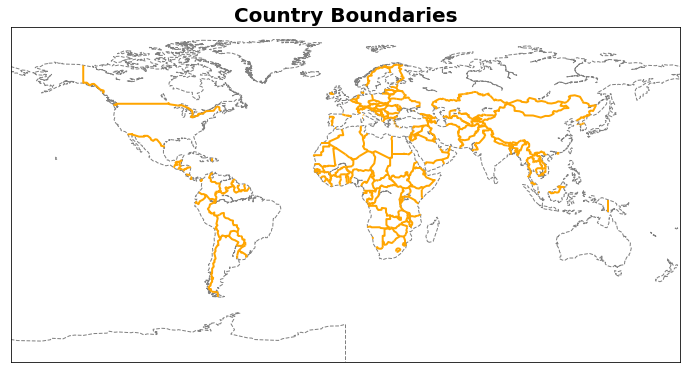

In [16]:
fig = plt.figure(figsize=(12,12))
m = Basemap()
m.drawcoastlines(linewidth=1, linestyle='dashed', color='grey')
m.drawcountries(linewidth=2, linestyle='solid', color='orange')
plt.title('Country Boundaries', fontsize=20, fontweight='bold')
plt.show()

**Draw Major Rivers**

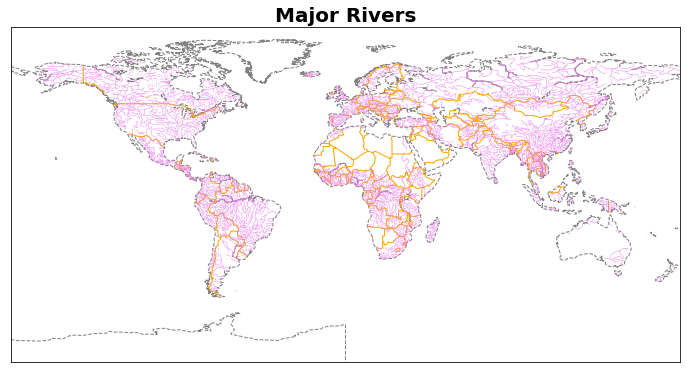

In [17]:
fig = plt.figure(figsize=(12,12))
m = Basemap()
m.drawcoastlines(linewidth=1, linestyle='dashed', color='grey')
m.drawcountries(linewidth=1, linestyle='solid', color='orange')
m.drawrivers(linewidth=0.5, linestyle='dashed', color='violet')
plt.title('Major Rivers', fontsize=20, fontweight='bold')
plt.show()

**Color Filled Continents**

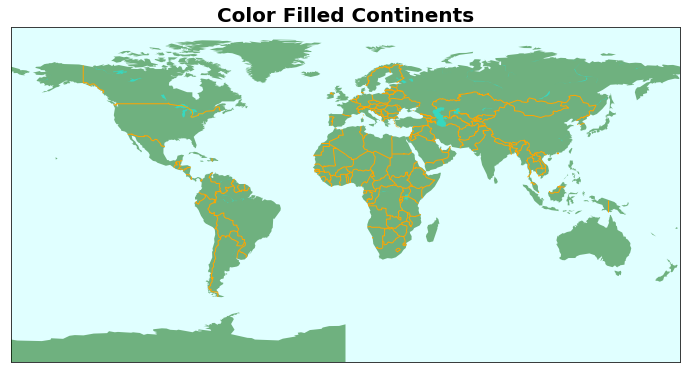

In [42]:
fig = plt.figure(figsize=(12,12))
m = Basemap()
m.drawcountries(linewidth=1, linestyle='solid', color='orange')
m.fillcontinents(color='darkgreen', lake_color='aqua', alpha=0.5)
m.drawmapboundary(color='k', linewidth=0.5, fill_color='lightcyan')
plt.title('Color Filled Continents', fontsize=20, fontweight='bold')
plt.show()

**Draw Longitude & Latitude**

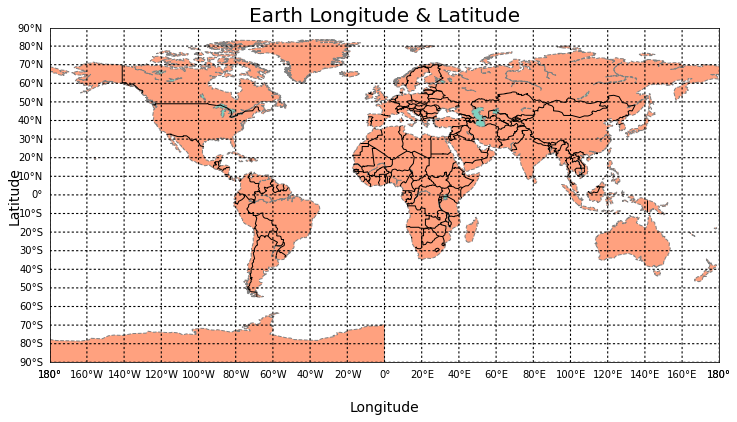

In [29]:
fig = plt.figure(figsize=(12,12))
m = Basemap()
m.drawcoastlines(linewidth=1, linestyle='dashed', color='grey')
m.drawcountries(linewidth=1, linestyle='solid', color='black')
m.fillcontinents(color='orangered', lake_color='aqua', alpha=0.5)
m.drawmeridians(range(0, 360, 20), color='k', linewidth=1.1, dashes=[2,2], labels=[0,0,0,1])
m.drawparallels(range(-90, 100, 10), color='k', linewidth=1.1, dashes=[2,2], labels=[1,0,0,0])
plt.title('Earth Longitude & Latitude', fontsize=20)
plt.xlabel('Longitude', fontsize=14, labelpad=35)
plt.ylabel('Latitude', fontsize=14, labelpad=25)
plt.show()

**Draw Map with Mercator Projection**

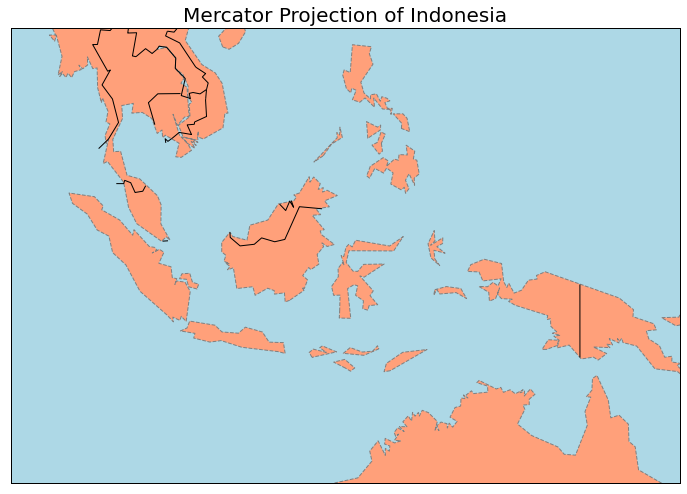

In [40]:
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='merc', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=90, urcrnrlon=150)
m.drawcoastlines(linewidth=1, linestyle='dashed', color='grey')
m.fillcontinents(color='lightsalmon', lake_color='lightblue')
m.drawcountries(linewidth=1, linestyle='solid', color='black')
m.drawmapboundary(fill_color='lightblue')
plt.title('Mercator Projection of Indonesia', fontsize=20)
plt.show()

**Draw Orthographic Projection**

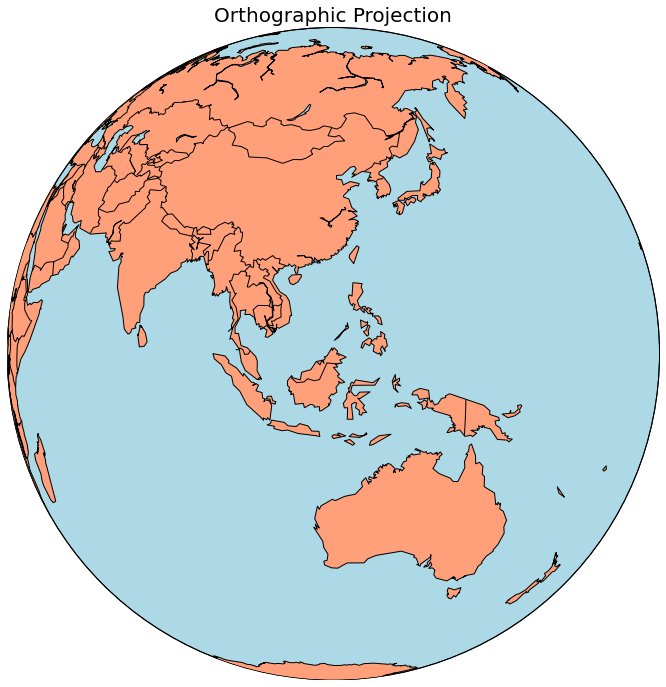

In [47]:
fig = plt.figure(figsize=(12,12))
m = Basemap(projection='ortho', lon_0=117, lat_0=6)
m.drawcoastlines()
m.fillcontinents(color='lightsalmon', lake_color='lightblue')
m.drawcountries(linewidth=1, linestyle='solid', color='k')
m.drawmapboundary(fill_color='lightblue')
plt.title('Orthographic Projection', fontsize=20)
plt.show()

**Draw Specific Region**

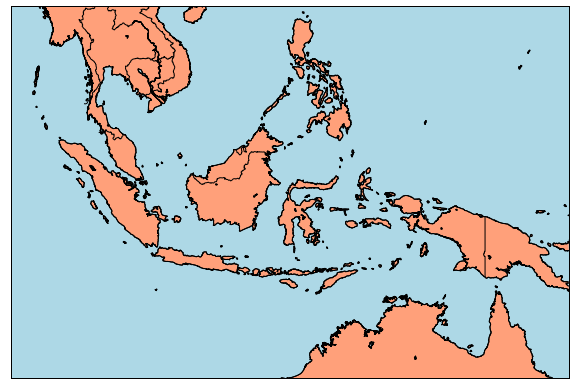

In [98]:
fig = plt.figure(figsize = (10,8))
m = Basemap(projection='cyl',llcrnrlat=-20, urcrnrlat=20, llcrnrlon=90, urcrnrlon=150, resolution = 'i')
m.drawcoastlines()
m.fillcontinents(color='lightsalmon',lake_color='lightblue')
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
m.drawmapboundary(fill_color='lightblue')
m.drawcoastlines()
plt.show()

**Nasa Blue Marble image as backgrpund map**

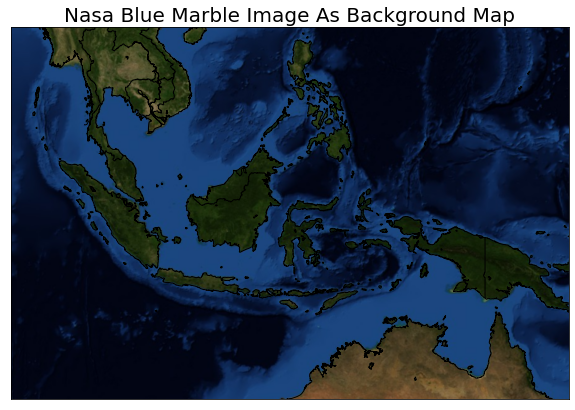

In [107]:
fig = plt.figure(figsize = (10,8))
m = Basemap(projection='cyl',llcrnrlat=-20, urcrnrlat=20, llcrnrlon=90, urcrnrlon=150, resolution = 'i')
m.bluemarble(scale=1.0)
m.drawcoastlines()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
plt.title('Nasa Blue Marble Image As Background Map', fontsize=20)
plt.show()

**Plotting netCDF data using Basemap**

In [113]:
from netCDF4 import Dataset as dataset
import numpy as np

In [110]:
nc = dataset('ECMWF_temp2m.nc')

In [111]:
# Defining Variables for Analysis
lat = nc.variables['latitude'][:]
lon = nc.variables['longitude'][:]
time = nc.variables['time'][:]
t2 = nc.variables['p2t'][:]

In [ ]:
# Converting Kelvin to Celcius
t2_celcius = t2 - 273.15
print(t2_celcius)

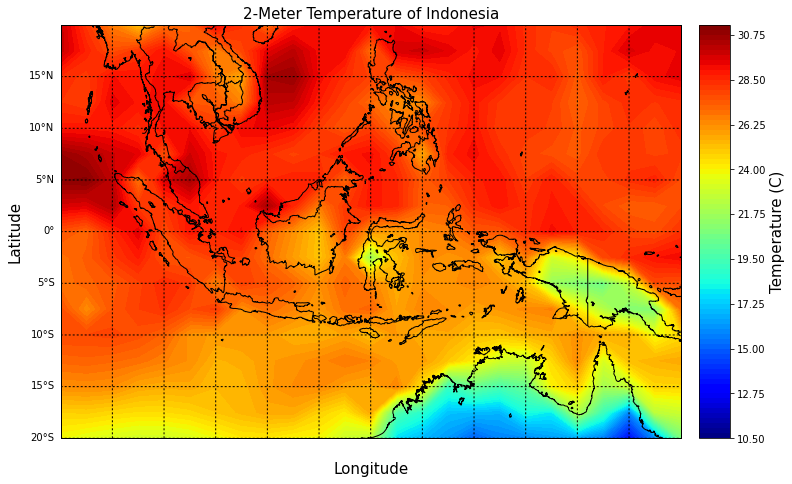

In [131]:
fig = plt.figure(num=None, figsize=(12, 12)) 
m = Basemap(projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=90, urcrnrlon=150, resolution = 'i')
x, y = m(*np.meshgrid(lon,lat))
cs = m.contourf(x, y ,np.squeeze(t2_celcius[4,:,:]), levels = 100, cmap=plt.cm.jet)
m.bluemarble(scale=1.0)
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
m.drawmeridians(range(90, 150, 5), color='k', linewidth=1, dashes=[2,2], lables=[0,0,0,1])
m.drawparallels(range(-20, 20, 5), color='k', linewidth=1, dashes=[2,2], labels=[1,0,0,0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Temperature (C)', fontsize=15)
plt.title('2-Meter Temperature of Indonesia', fontsize=15)
plt.savefig('temperature_countur.jpg')
plt.show()

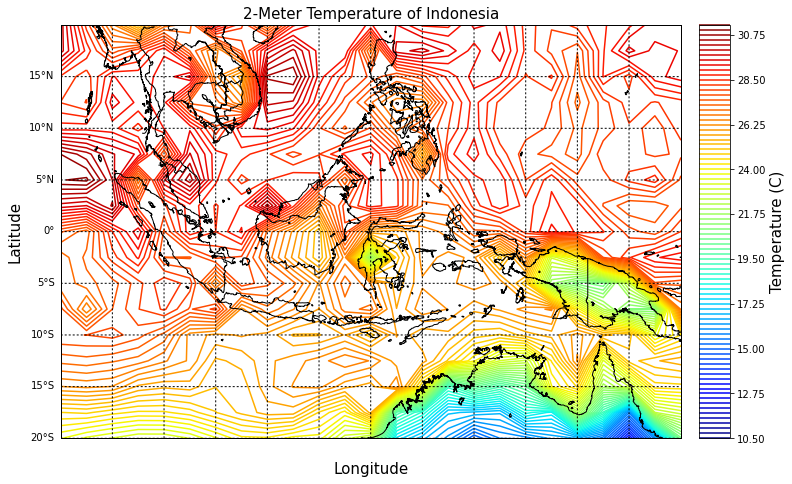

In [132]:
fig = plt.figure(num=None, figsize=(12, 12)) 
m = Basemap(projection='cyl', llcrnrlat=-20, urcrnrlat=20, llcrnrlon=90, urcrnrlon=150, resolution = 'i')
x, y = m(*np.meshgrid(lon,lat))
cs = m.contour(x, y ,np.squeeze(t2_celcius[4,:,:]), levels = 100, cmap=plt.cm.jet)
m.bluemarble(scale=1.0)
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
m.drawmeridians(range(90, 150, 5), color='k', linewidth=1, dashes=[2,2], lables=[0,0,0,1])
m.drawparallels(range(-20, 20, 5), color='k', linewidth=1, dashes=[2,2], labels=[1,0,0,0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Temperature (C)', fontsize=15)
plt.title('2-Meter Temperature of Indonesia', fontsize=15)
plt.savefig('temperature_countur.jpg')
plt.show()